### Tahriou Samira
## Multiple Lineaire regressie

### FuelConsumption

**Problem Stastement:** Ability to model and predict the fuel consumption is vital in enhancing fuel economy of vehicles and preventing fraudulent activities in fleet management. Fuel consumption of a vehicle depends on several internal factors such as distance, load, vehicle characteristics, and driver behavior, as well as external factors such as road conditions, traffic, and weather. However, not all these factors may be measured or available for the fuel consumption analysis. We consider a case where only a subset of the aforementioned factors is available as a multi-variate time series from a long distance, public bus. Hence, the challenge is to model and/or predict the fuel consumption only with the available data, while still indirectly capturing as much as influences from other internal and external factors. Machine Learning (ML) is suitable in such analysis, as the model can be developed by learning the patterns in data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

from sklearn.ensemble import IsolationForest


In [2]:
#data inladen
raw_data=pd.read_csv('data/FuelConsumption.csv')
raw_data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
raw_data.shape #aantal kolommen,rijen

(1067, 13)

In [4]:
raw_data.info() #extra info: kolomnamen, kolomtypes, aantal not null waardes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
raw_data.describe().T #statischtische samenvatting

,count,mean,std,min,25%,50%,75%,max
MODELYEAR,1067.0,2014.000000,0.000000,2014.0,2014.00,2014.0,2014.00,2014.0
ENGINESIZE,1067.0,3.346298,1.415895,1.0,2.00,3.4,4.30,8.4
CYLINDERS,1067.0,5.794752,1.797447,3.0,4.00,6.0,8.00,12.0
FUELCONSUMPTION_CITY,1067.0,13.296532,4.101253,4.6,10.25,12.6,15.55,30.2
FUELCONSUMPTION_HWY,1067.0,9.474602,2.794510,4.9,7.50,8.8,10.85,20.5
FUELCONSUMPTION_COMB,1067.0,11.580881,3.485595,4.7,9.00,10.9,13.35,25.8
FUELCONSUMPTION_COMB_MPG,1067.0,26.441425,7.468702,11.0,21.00,26.0,31.00,60.0
CO2EMISSIONS,1067.0,256.228679,63.372304,108.0,207.00,251.0,294.00,488.0


In [6]:
raw_data.isna().sum() #nulwaardes per kolom

MODELYEAR                   0
MAKE                        0
MODEL                       0
VEHICLECLASS                0
ENGINESIZE                  0
CYLINDERS                   0
TRANSMISSION                0
FUELTYPE                    0
FUELCONSUMPTION_CITY        0
FUELCONSUMPTION_HWY         0
FUELCONSUMPTION_COMB        0
FUELCONSUMPTION_COMB_MPG    0
CO2EMISSIONS                0
dtype: int64

In [7]:
#Data Profiler Sweetviz
import sweetviz as sv
rapport = sv.analyze(raw_data)
rapport.show_html("rapport.html")

                                             |          | [  0%]   00:00 -> (? left)

Report rapport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [8]:
raw_data.duplicated().sum() #aantal duplicaten

0

In [9]:
raw_data.columns #de kolommen

Index(['MODELYEAR', 'MAKE', 'MODEL', 'VEHICLECLASS', 'ENGINESIZE', 'CYLINDERS',
       'TRANSMISSION', 'FUELTYPE', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB',
       'FUELCONSUMPTION_COMB_MPG', 'CO2EMISSIONS'],
      dtype='object')

In [10]:
# X en y definiëren
X = raw_data.drop(columns=['CO2EMISSIONS'])
y = raw_data['CO2EMISSIONS']

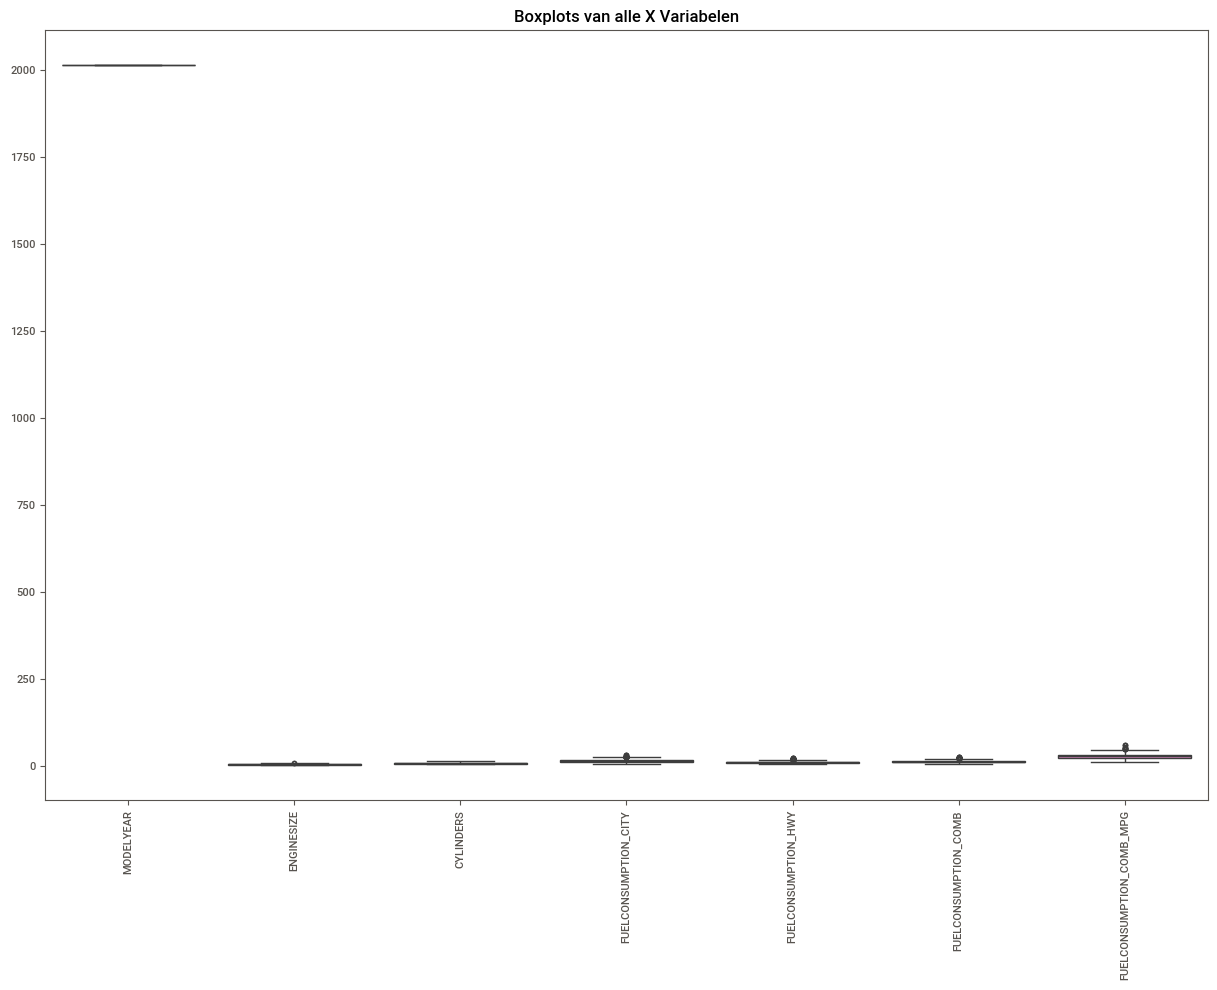

In [11]:
#Boxplots van alle X variabelen
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplots van alle X Variabelen')
plt.show()

In [12]:
raw_data['MODELYEAR'].value_counts()

MODELYEAR
2014    1067
Name: count, dtype: int64

In [13]:
# modelyear verwijderen uit X (modelyear is overal de waarde 2014)
X = X.drop(columns=['MODELYEAR'])

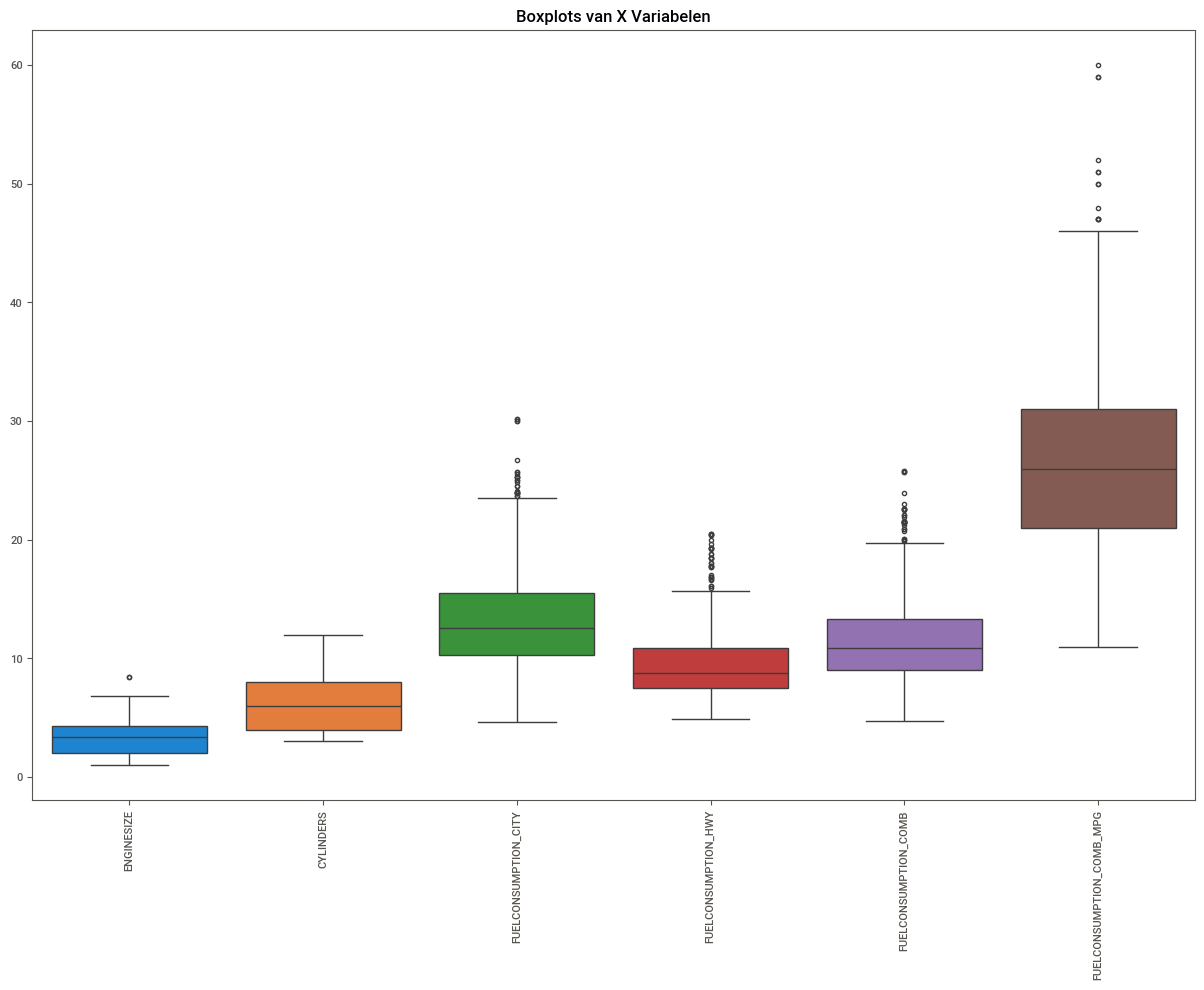

In [14]:
#Boxplots van X variabelen zonder ModelYear
plt.figure(figsize=(15, 10))
sns.boxplot(data=X)
plt.xticks(rotation=90)
plt.title('Boxplots van X Variabelen')
plt.show()

In [15]:
# Numerieke en categorische kolommen
num_features = ['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']
cat_features = ['MAKE', 'MODEL', 'VEHICLECLASS', 'TRANSMISSION', 'FUELTYPE']


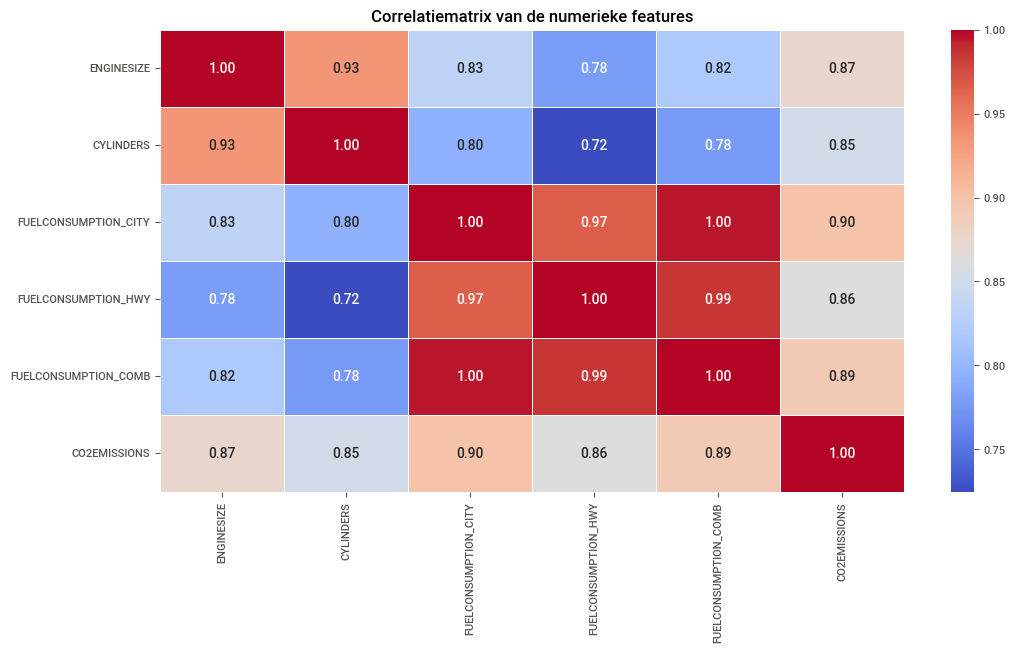

In [16]:
# Correlatiematrix
corr_matrix = raw_data[num_features + ['CO2EMISSIONS']].corr()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlatiematrix van de numerieke features")
plt.show()

In [17]:
#de onderlinge gecorreleerde features verwijderen:
X = raw_data.drop(columns=['FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','CYLINDERS'])  


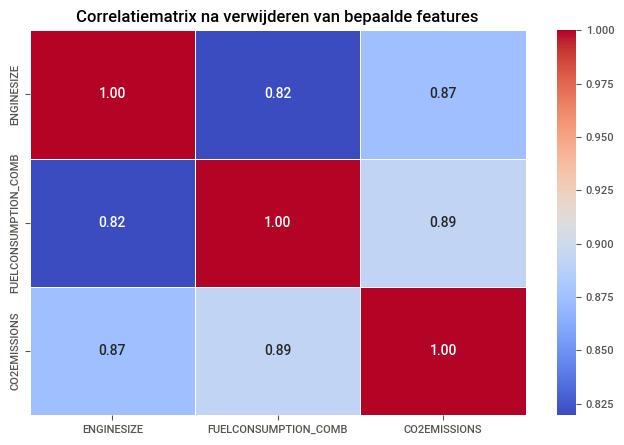

In [18]:
# Nieuwe lijst met numerieke features (zonder de onderling gecorreleerde kolommen)
num_features_zondercorr = ['ENGINESIZE', 'FUELCONSUMPTION_COMB']

# Correlatiematrix
corr_matrix_new = raw_data[num_features_zondercorr  + ['CO2EMISSIONS']].corr()

plt.figure(figsize=(8, 5))
sns.heatmap(corr_matrix_new, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlatiematrix na verwijderen van bepaalde features")
plt.show()


In [19]:
# Outliers verwijderen met Isolation Forest
iso = IsolationForest(random_state=42)
outlier_predictions = iso.fit_predict(raw_data[num_features_zondercorr])
df_zonder_dupl_outl = raw_data[outlier_predictions == 1]


In [20]:
# Mijn pipeline

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features_zondercorr),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_features)
])

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

X = df_zonder_dupl_outl[num_features_zondercorr + cat_features]  
y = df_zonder_dupl_outl['CO2EMISSIONS'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

# Het model trainen:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['ENGINESIZE',
                                                   'FUELCONSUMPTION_COMB']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['MAKE', 'MODEL',
                                                   'VEHICLECLASS',
                                                   'TRANSMISSION',
                                                   'FUELTYPE'])])),
                ('regressor', LinearRegression())])

In [21]:
# Voorspellen en R² score & MSE:
y_pred = pipeline.predict(X_test)
print(f"R2-score: {r2_score(y_test, y_pred):.4f}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")

R2-score: 0.9932
Mean Squared Error: 14.8157


In [22]:
# Ik heb een hoge R2 score op de test data (0,99), om te controleren of er geen sprake is van overfitting 
# heb ik de R² score apart berekent voor de trainingsdata en testdata:

In [23]:
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# De R²-score en MSE voor beide sets
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f" R²-score op de Train data: {train_r2:.4f}")
print(f" R²-score op de Test data: {test_r2:.4f}")
print(f" Mean Squared Error op Train data: {train_mse:.4f}")
print(f" Mean Squared Error op Test data: {test_mse:.4f}")

 R²-score op de Train data: 0.9988
 R²-score op de Test data: 0.9932
 Mean Squared Error op Train data: 3.0282
 Mean Squared Error op Test data: 14.8157


In [24]:
## In de orginele document heeft de LinearRegression de scores:
# Train R² Score of a Model is : 0.8855039079796118
# Test R² Score of a Model is : 0.8997269157573581

In [25]:
# Ik heb zowel op de trainingsdata als de testdata een goede de score en MSE. Om te controleren of mijn model goed presteert op verschillende folds van de data
# of het consistent goed presteert zonder overfitting, heb ik K-Fold Cross-Validatie uitgevoerd:

kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Cross-validatie met 5 folds:
cv_scores = cross_val_score(pipeline, X, y, cv=kf, scoring='r2')
print(f"Cross-validated R²-scores: {cv_scores}")
print(f"Gemiddelde R²-score: {cv_scores.mean():.4f}")
print(f"Standaardafwijking R²-score: {cv_scores.std():.4f}")

Cross-validated R²-scores: [0.99459055 0.99671444 0.99295632 0.99505682 0.99347502]
Gemiddelde R²-score: 0.9946
Standaardafwijking R²-score: 0.0013
